Name-Adhiraj Karjee
Entry No-2024HES7241

Step 1: Dataset Accessing,Loadig the dataset and Creating Multiindexed dataframe

In [13]:
import pandas as pd
file_paths = {
    'AAPL': r"C:\Users\HP\Desktop\CAIC IITD\aapl.us.txt",
    'MSTR': r"C:\Users\HP\Desktop\CAIC IITD\mstr.us.txt",
    'AMZN': r"C:\Users\HP\Desktop\CAIC IITD\amzn.us.txt",
    'ABBV': r"C:\Users\HP\Desktop\CAIC IITD\abbv.us.txt",
    'GOOGL': r"C:\Users\HP\Desktop\CAIC IITD\googl.us.txt"
}

frames = []
for ticker, path in file_paths.items():
    try:
        df = pd.read_csv(path, parse_dates=['Date'])
        df['Ticker'] = ticker  
        frames.append(df)
    except Exception as e:
        print(f"Could not read {ticker} from {path}: {e}")

if frames:
    all_data = pd.concat(frames, ignore_index=True)
    all_data.set_index(['Ticker', 'Date'], inplace=True)
    all_data.sort_index(inplace=True)
    print("Combined DataFrame (first 5 rows):")
    print(all_data.head())
else:
    print("No data was loaded. Please check your file paths and files.")


Combined DataFrame (first 5 rows):
                      Open     High      Low    Close    Volume  OpenInt
Ticker Date                                                             
AAPL   1984-09-07  0.42388  0.42902  0.41874  0.42388  23220030        0
       1984-09-10  0.42388  0.42516  0.41366  0.42134  18022532        0
       1984-09-11  0.42516  0.43668  0.42516  0.42902  42498199        0
       1984-09-12  0.42902  0.43157  0.41618  0.41618  37125801        0
       1984-09-13  0.43927  0.44052  0.43927  0.43927  57822062        0


In [11]:
print(multi_df.index.names)  

['Ticker', 'Ticker', 'Ticker', 'Date']


Step 2: Data Cleaning and handling missing values and filtering the data to include only the last 10 years

In [19]:
frames = []
for ticker, path in file_paths.items():
    df = pd.read_csv(path, parse_dates=['Date'])
    df['Ticker'] = ticker 
    frames.append(df)
multi_df = pd.concat(frames)
multi_df.set_index(['Ticker', 'Date'], inplace=True)
multi_df.sort_index(inplace=True)


In [21]:
print(multi_df.columns)  

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


In [23]:
print("Columns:", multi_df.columns.tolist())
print("Index names:", multi_df.index.names)


Columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
Index names: ['Ticker', 'Date']


In [25]:
missing_values = multi_df.isnull().groupby(level='Ticker').sum()
print("Missing values per ticker:\n", missing_values)


Missing values per ticker:
         Open  High  Low  Close  Volume  OpenInt
Ticker                                         
AAPL       0     0    0      0       0        0
ABBV       0     0    0      0       0        0
AMZN       0     0    0      0       0        0
GOOGL      0     0    0      0       0        0
MSTR       0     0    0      0       0        0


In [27]:
cutoff_date = pd.Timestamp('2015-06-02')
multi_df = multi_df[multi_df.index.get_level_values('Date') >= cutoff_date]
print(multi_df.head())


                     Open    High     Low   Close    Volume  OpenInt
Ticker Date                                                         
AAPL   2015-06-02  123.92  124.68  123.43  124.00  35247319        0
       2015-06-03  124.69  124.96  123.95  124.16  32466240        0
       2015-06-04  123.68  124.61  123.03  123.47  40290158        0
       2015-06-05  123.63  123.79  122.49  122.77  37331747        0
       2015-06-08  123.02  123.32  121.03  121.97  55195489        0


In [29]:
summary = multi_df.groupby('Ticker').describe()
print(summary)


         Open                                                                \
        count        mean         std      min       25%      50%       75%   
Ticker                                                                        
AAPL    619.0  120.009336   21.990485   87.649  104.8600  112.700  140.2650   
ABBV    619.0   62.272729    9.689680   45.897   56.4875   60.436   64.3190   
AMZN    619.0  747.683069  175.469927  422.960  598.1950  759.870  887.7500   
GOOGL   619.0  797.605549  115.268197  542.250  726.6600  788.380  856.8475   
MSTR    619.0  177.003446   21.501483  123.930  169.5200  181.890  190.8900   

                  High              ...      Volume              OpenInt       \
            max  count        mean  ...         75%          max   count mean   
Ticker                              ...                                         
AAPL     175.11  619.0  120.957856  ...  44967449.0  169159067.0   619.0  0.0   
ABBV      96.78  619.0   62.927417  ...   9

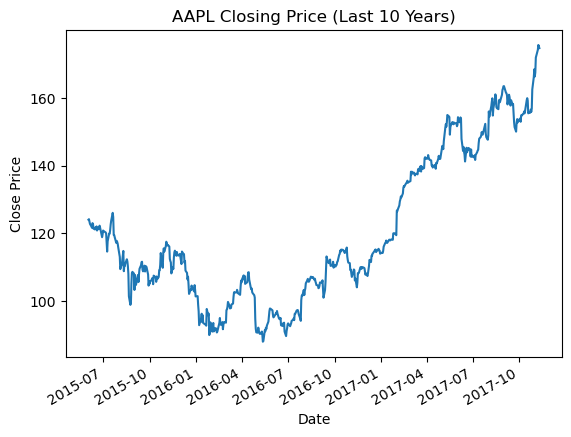

In [31]:
import matplotlib.pyplot as plt

aapl = multi_df.loc['AAPL']
aapl['Close'].plot(title='AAPL Closing Price (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


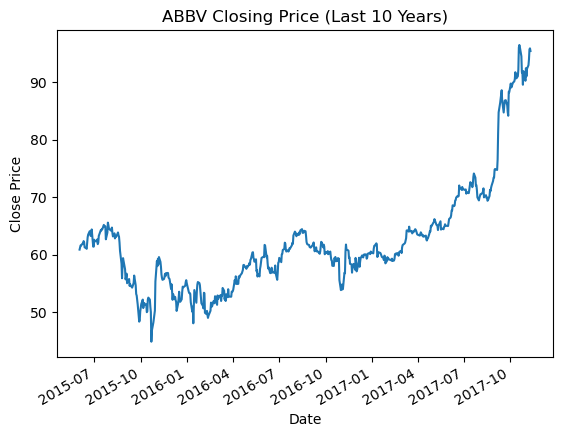

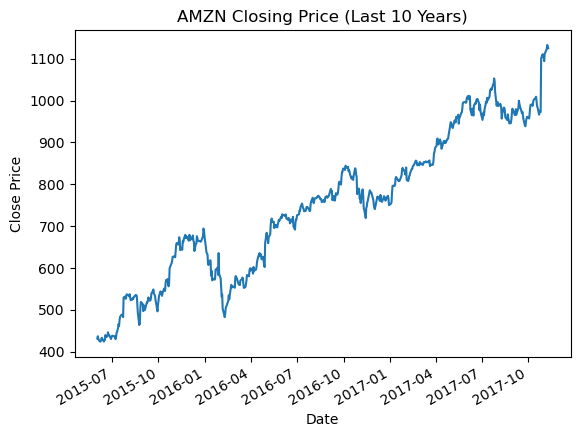

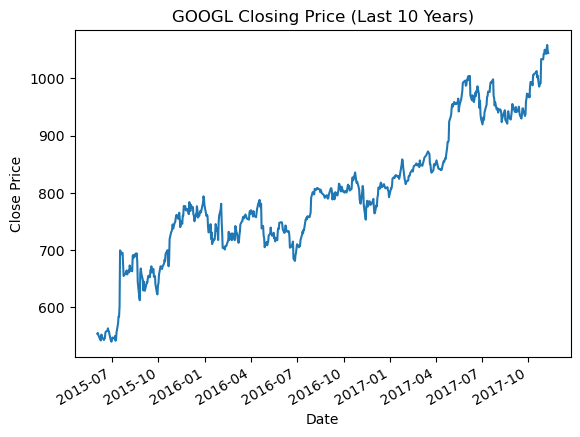

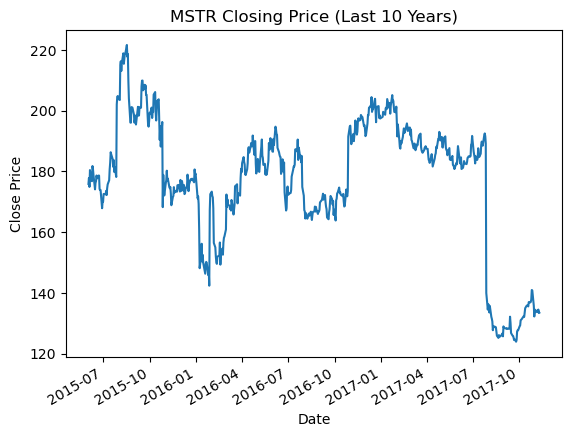

In [33]:
import matplotlib.pyplot as plt
tickers = ['ABBV', 'AMZN', 'GOOGL', 'MSTR']
for ticker in tickers:
    stock_data = multi_df.loc[ticker]
    stock_data['Close'].plot(title=f'{ticker} Closing Price (Last 10 Years)')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()


Step 3: Data Transformation on Daily Return,7 day MA,30 Day MA,Rolling Volatility (30d):

In [35]:
multi_df['Daily Return'] = multi_df.groupby(level='Ticker')['Close'].pct_change() * 100
multi_df['7-day MA'] = multi_df.groupby(level='Ticker')['Close'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)
multi_df['30-day MA'] = multi_df.groupby(level='Ticker')['Close'].transform(
    lambda x: x.rolling(window=30, min_periods=1).mean()
)
multi_df['Rolling Volatility (30d)'] = multi_df.groupby(level='Ticker')['Daily Return'].transform(
    lambda x: x.rolling(window=30, min_periods=1).std()
)

print(multi_df.head())


                     Open    High     Low   Close    Volume  OpenInt  \
Ticker Date                                                            
AAPL   2015-06-02  123.92  124.68  123.43  124.00  35247319        0   
       2015-06-03  124.69  124.96  123.95  124.16  32466240        0   
       2015-06-04  123.68  124.61  123.03  123.47  40290158        0   
       2015-06-05  123.63  123.79  122.49  122.77  37331747        0   
       2015-06-08  123.02  123.32  121.03  121.97  55195489        0   

                   Daily Return    7-day MA   30-day MA  \
Ticker Date                                               
AAPL   2015-06-02           NaN  124.000000  124.000000   
       2015-06-03      0.129032  124.080000  124.080000   
       2015-06-04     -0.555735  123.876667  123.876667   
       2015-06-05     -0.566939  123.600000  123.600000   
       2015-06-08     -0.651625  123.274000  123.274000   

                   Rolling Volatility (30d)  
Ticker Date                        

Step 4: Exploratory Analysis

In [41]:
average_returns = multi_df.groupby(level='Ticker')['Daily Return'].mean().sort_values(ascending=False)
average_returns


Ticker
AMZN     0.170225
GOOGL    0.112616
ABBV     0.086694
AAPL     0.065802
MSTR    -0.018955
Name: Daily Return, dtype: float64

In [43]:
max_volatility = (
    multi_df.groupby(level='Ticker')['Rolling Volatility (30d)']
    .agg(['max', 'idxmax'])
)
max_volatility

,max,idxmax
Ticker,,
AAPL,2.717579,"(AAPL, 2015-09-14 00:00:00)"
ABBV,3.645718,"(ABBV, 2015-11-02 00:00:00)"
AMZN,3.508582,"(AMZN, 2016-02-23 00:00:00)"
GOOGL,3.806680,"(GOOGL, 2015-08-26 00:00:00)"
MSTR,4.940686,"(MSTR, 2017-08-07 00:00:00)"


Highest average return (10 years)-AMZN
Most volatile month and when-MSTR, August 2017 (4.94%)